In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [20]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.18.1
1.0.1
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
0.22.1


In [21]:
df = pd.read_csv("..//resources//csv//data//biometrics.csv")

In [22]:
df.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD,PhaseName,MatchesSam
0,2020-11-01 21:14:54,72.1,832,0.10,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
1,2020-11-01 21:14:56,78.6,763,28.34,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
2,2020-11-01 21:14:56,75.8,792,0.00,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
3,2020-11-01 21:14:58,71.4,840,0.00,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True
4,2020-11-01 21:14:58,74.2,809,4.36,13.25,0,0,0.0,0.0,0.0,0.0,HA_PV,True


In [27]:
A = np.array(df['HR'])
A = A.astype(int)
A
#normalized_X = preprocessing.normalize([A])
#normalized_X

test = pd.DataFrame(A, columns=['HR'])
normalize(test['HR'].values.reshape(-1, 1), axis=0)

(A-A.min())/np.ptp(A.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [18]:
#sns.pairplot(df, height=4, aspect=1);

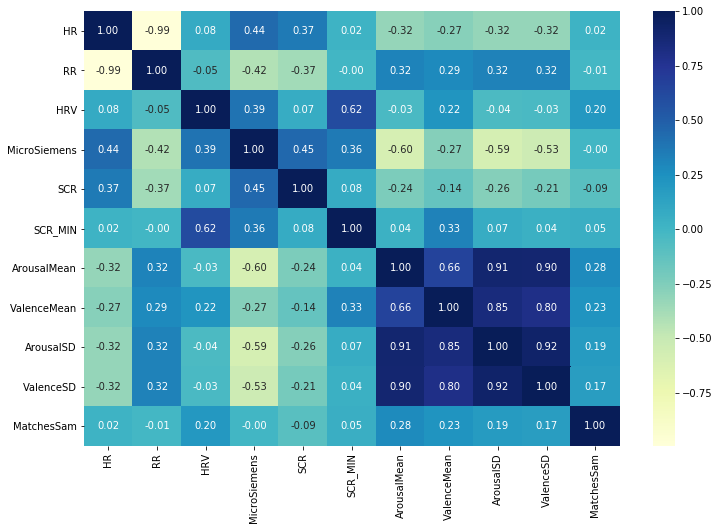

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [8]:
# Filter outliers (arousal - valence = 0)
filter = df['ArousalMean'] > 0
filtered = df[filter]
filtered.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD,PhaseName,MatchesSam
62,2020-11-01 21:15:42,82.2,730,23.02,11.14,0,4,6.07,7.63,2.31,1.41,HA_PV,True
63,2020-11-01 21:15:42,90.2,665,22.11,11.53,0,4,6.07,7.63,2.31,1.41,HA_PV,True
65,2020-11-01 21:15:43,96.8,620,20.62,12.27,1,5,7.31,7.21,1.64,2.26,HA_PV,True
66,2020-11-01 21:15:45,96.8,620,19.91,11.43,0,5,6.68,7.20,1.97,2.35,HA_PV,True
67,2020-11-01 21:15:45,74.9,801,18.88,11.29,0,5,6.68,7.20,1.97,2.35,HA_PV,True


In [9]:
X = df[['HR', 'RR', 'HRV']].values
y = df[['ArousalMean']].values
X

array([[7.210e+01, 8.320e+02, 1.000e-01],
       [7.860e+01, 7.630e+02, 2.834e+01],
       [7.580e+01, 7.920e+02, 0.000e+00],
       ...,
       [8.520e+01, 7.040e+02, 1.344e+01],
       [8.050e+01, 7.450e+02, 1.344e+01],
       [7.490e+01, 8.010e+02, 1.344e+01]])

In [10]:
X[0]

array([7.21e+01, 8.32e+02, 1.00e-01])

In [11]:
y

array([[0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.  

In [12]:
# Para poder usar un clasificador, los datos de la variable target deben ser discretos.
#Los convertimos a True-False (Aroused-NotAroused) con el fin de poder entrear un clasificador binario

y_train_aroused = (y > 4)

In [13]:
y_train_aroused

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [